# Sprint 機械学習スクラッチ　ロジスティック回帰

## 【問題1】仮定関数

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns1
import random

In [6]:
from sklearn.datasets import load_iris
a = load_iris()
#print(a)
X = a.data[0:100]
y = a.target[0:100,]
#print(y[0:100])
#print(X[0:100,])
print(y.shape)

(100,)


In [50]:
def bias(X,bias='Ture'):
    n0=X.shape[0]

    if bias == 'Ture':
        x_one = np.ones(n0)
        x_one_x = np.vstack((x_one,X.T))
        X2 = x_one_x.T
    else:
        x_zeros = np.zeros(n0)
        x_zeros_x = np.vstack((x_zeros,X.T))
        X2 = x_zeros_x.T
        
    return X2  

In [77]:
X2=bias(X,bias='Ture')

In [99]:
def _linear_hypothesis(X):
    y1 = ceet@X2.T
    #シグモイド追加
    y_s = 1 / (1 + np.exp(-y1))
    #y_pre = np.reshape(y_s, (y_s.shape[0],1))
    return y_s

In [59]:
def fit (X,y):
    
    X2= bias(X,bias='Ture')
    
    n1=X2.shape[1]
    
    #パラメータに乱数リスト作る    
    ceet=np.full(n1,random.random())
    
    #式に当てはめる    
    y_pre = _linear_hypothesis(X)
    
    return y,y_s

In [52]:
def sigmoid(y):
    y_s = 1 / (1 + np.exp(-y))
    return y_s

In [70]:
Xb =bias(X,bias='FA')
#print(Xb)
print(Xb[0,0])

0.0


In [53]:
a,aa = fit(X,y)

In [31]:
#print(a)
#print(aa)

## 【問題2】最急降下法

In [73]:
#一旦XbがX0を「１」or「０」で埋めたもののしぇーぷ
n1=Xb.shape[1]
print(n1)

5


In [74]:
ceet=np.full(n1,random.random())

In [98]:
qqq = _linear_hypothesis(X)
#print(qqq)

In [140]:
def _gradient_descent(X, y):
    """
    説明を記述
    次のシータの値を求める
    
    """
    aaaa=0.001
    s = _linear_hypothesis(X)
    
    #降下
    p=(s-y)
    
    pr= np.reshape(p, (p.shape[0],1))
    
    yyy = np.multiply(pr,Xb)
    sum_yyy = yyy.sum(0)
    
    sum_ave_yyy = sum_yyy/yyy.shape[1]

    #ラムダ2
    lam=2/yyy.shape[1]*ceet

    #バイアス有無で足すか否かをかえる
    #一旦XbがX0を「１」or「０」で埋めたものかける
    sum_ave_yyy+(lam*Xb[0,0])
    
    hyp = aaaa*sum_ave_yyy
    
    
    new_ceet = ceet-hyp
    
    
        
    pass
    return new_ceet

In [89]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [100]:
s = _linear_hypothesis(X)
print(s.shape)
print(y.shape)
p=s-y
print(p.shape)

(100,)
(100,)
(100,)


In [138]:
pr= np.reshape(p, (p.shape[0],1))
print(pr.shape)
print(X.shape)
yyy= np.multiply(pr,X)
print(yyy.shape)
#print(Xb[0,0])
print(Xb.shape)

(100, 1)
(100, 4)
(100, 4)
(100, 5)


In [132]:
#print(yyy)
sum_yyy = yyy.sum(0)
print(sum_yyy.shape)
sum_ave_yyy = sum_yyy/yyy.shape[1]
print(sum_ave_yyy.shape)

lam=2/yyy.shape[1]*ceet

print(yyy.shape[1])
print(lam)
print(lam.shape)

#hyp = aaaa*sum_ave_yyy    
#new_ceet = ceet-hyp

(4,)
(4,)
4
[0.26547538 0.26547538 0.26547538 0.26547538 0.26547538]
(5,)


In [141]:
_gradient_descent(X, y)

array([0.53095075, 0.48105475, 0.49677694, 0.51638741, 0.52850204])

## 【問題3】推定

In [1]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _bias(self,X,bias):
        n0=X.shape[0]
        if self.bias == 'Ture':
            x_one = np.ones(n0)
            x_one_x = np.vstack((x_one,X.T))
            self.X2 = x_one_x.T
        else:
            x_zeros = np.zeros(n0)
            x_zeros_x = np.vstack((x_zeros,X.T))
            self.X2 = x_zeros_x.T        
        return self.X2    
        
                
    def _linear_hypothesis(self,X):
        y1 = self.ceet@self.X2.T
        self.y_sigmoi = 1 / (1 + np.exp(-y1))
        #y = np.reshape(y1, (y1.shape[0],1))

        return self.y_sigmoi
    
        
    def _gradient_descent(self,X, y):
        p=(self.y_sigmoi-y)
        pr= np.reshape(p, (p.shape[0],1))
    
        yyy = np.multiply(pr,self.X2)
        sum_yyy = yyy.sum(0)
    
        sum_ave_yyy = sum_yyy/yyy.shape[1]
        lam=2/yyy.shape[1]*ceet
        sum_ave_y_lam=sum_ave_yyy+(lam*self.X2[0,0])
        
        hyp = self.lr*sum_ave_y_lam
    
        self.ceet = self.ceet-hyp
        return self.ceet        

        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.X2 = self._bias(X,self.bias)
        self.ceet=np.full(n1,random.random())

        if self.verbose == 'Ture':
            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(X)
                self.ceet=self._gradient_descent(X,y)
                #print(self.y_pre)
        else:
            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(X)
                self.ceet=self._gradient_descent(X,y)     
            
        return self.ceet

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)
        n_p = y_prob_pre.shape[0]
        y_pre_k = np.arange(n_p)

        for i in range(n_p):
            if y_prob_pre[i] > 0.5:
                np.put(y_pre_k,[i],[1])
            else:
                np.put(y_pre_k,[i],[0])
        return y_pre_k

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)

        pass
        return y_prob_pre

In [176]:
sr = ScratchLogisticRegression(num_iter=1000, lr=0.001, bias='Ture', verbose=1)

In [152]:
#print(X)
#print(y)

In [177]:
sr.fit(X,y)

array([ 0.29471403, -0.63643144, -1.11058683,  1.98362505,  1.32231234])

In [178]:
ppp=sr.predict_proba(X)
print(ppp)

[0.0219541  0.04253251 0.03207069 0.05542053 0.02095874 0.02732583
 0.03786611 0.03156788 0.06387933 0.04074005 0.01778793 0.04319439
 0.03982537 0.03048732 0.00551846 0.00887885 0.01254676 0.02498027
 0.02221941 0.02189872 0.03621531 0.02776301 0.01233509 0.07025988
 0.07566198 0.05836281 0.0492326  0.02504094 0.02299563 0.05667225
 0.05926105 0.03187163 0.01142493 0.00793436 0.04623328 0.02195612
 0.01407004 0.01959663 0.04768996 0.02967917 0.02190074 0.10450227
 0.03855739 0.05693046 0.05347902 0.05126367 0.0233609  0.0412804
 0.01893468 0.02900531 0.96953066 0.97281309 0.98468892 0.98003285
 0.98457788 0.98526566 0.98302674 0.91521703 0.97627572 0.97272315
 0.9591595  0.97132685 0.96407193 0.98745806 0.91451495 0.95957305
 0.98672775 0.95521239 0.9919606  0.95870778 0.99251583 0.95056253
 0.99457857 0.985409   0.96265316 0.96583177 0.98565599 0.99234657
 0.98471085 0.88539364 0.95776089 0.94216889 0.9492008  0.99669737
 0.98829546 0.97684557 0.98004875 0.98489936 0.96270207 0.97518

In [171]:
y_pre_k_t = np.arange(100)
print(y_pre_k_t)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [173]:
np.put(y_pre_k_t,[3],[1])

In [174]:
print(y_pre_k_t)

[ 0  1  2  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [180]:
llll=sr.predict(X)
print(llll)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [181]:
srf = ScratchLogisticRegression(num_iter=1000, lr=0.001, bias='Fa', verbose=1)

In [182]:
srf.fit(X,y)

array([ 0.43935028, -0.51682982, -1.18003329,  2.01071822,  1.16157817])

In [183]:
pppf=srf.predict_proba(X)
print(pppf)

[0.02369231 0.04629834 0.03360306 0.05802376 0.02220575 0.02902456
 0.03819705 0.033965   0.06606137 0.04485902 0.01967354 0.0455019
 0.0435333  0.03123387 0.00622728 0.00940217 0.01319746 0.02653313
 0.02500487 0.02285628 0.04099455 0.02871371 0.01233987 0.07371799
 0.08015698 0.06447778 0.0514423  0.0274051  0.0252758  0.05976319
 0.06360046 0.03481452 0.01220757 0.00856574 0.05010758 0.02377454
 0.015884   0.02084813 0.04889721 0.03230946 0.02293568 0.11131255
 0.03901891 0.05731501 0.05546384 0.05429985 0.02483158 0.04285213
 0.02069546 0.03134245 0.97546156 0.97603214 0.98751492 0.98194804
 0.98698027 0.98672175 0.98461356 0.919265   0.9806625  0.97325778
 0.96284794 0.97335087 0.97089756 0.98903289 0.91925694 0.96618682
 0.98733607 0.9616472  0.99324156 0.96356839 0.99273132 0.95673446
 0.9954532  0.98772105 0.96851743 0.97131267 0.98855986 0.993474
 0.9861773  0.89890125 0.96245045 0.94914541 0.95486845 0.99705917
 0.98856548 0.97798273 0.98324036 0.98771612 0.96509678 0.9772522

## 【問題4】目的関数

In [110]:
print(X.shape)
print(y.shape)

(100, 4)
(100,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,train_size=0.75,shuffle = True)


In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 4)
(75,)
(25, 4)
(25,)


#### テストデータの目的変数以外ちゃんと動くものキープ↓

In [113]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _bias(self,X,bias):
        n0=X.shape[0]
        if self.bias == 'Ture':
            x_one = np.ones(n0)
            x_one_x = np.vstack((x_one,X.T))
            self.X2 = x_one_x.T
        else:
            x_zeros = np.zeros(n0)
            x_zeros_x = np.vstack((x_zeros,X.T))
            self.X2 = x_zeros_x.T        
        return self.X2    
        
                
    def _linear_hypothesis(self,X):
        y1 = self.ceet@self.X2.T
        self.y_sigmoi = 1 / (1 + np.exp(-y1))
        #y = np.reshape(y1, (y1.shape[0],1))

        return self.y_sigmoi
    
       
    def _gradient_descent(self,X, y):
        p=(self.y_sigmoi-y)
        pr= np.reshape(p, (p.shape[0],1))
    
        yyy = np.multiply(pr,self.X2)
        sum_yyy = yyy.sum(0)
    
        sum_ave_yyy = sum_yyy/yyy.shape[1]
        lam=2/yyy.shape[1]*self.ceet
        sum_ave_y_lam=sum_ave_yyy+(lam*self.X2[0,0])
        
        hyp = self.lr*sum_ave_y_lam
    
        self.ceet = self.ceet-hyp
        return self.ceet        

        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.X2 = self._bias(X,self.bias)
        n1 = self.X2.shape[1]
        self.ceet=np.full(n1,random.random())

        if self.verbose == 'Ture':
            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(X)
                self.ceet=self._gradient_descent(X,y)
                #print(self.y_pre)
                #Trainデータの目的関数(損失関数)
                m=self.y_pre.shape[0]
                log = -y*np.log(self.y_pre)-(1-y)*np.log(1-self.y_pre)
                lam=2/2*m*self.ceet
                loss_lam = log.sum(0)+lam
                loss = loss_lam/m
                np.put(self.loss,[i],loss)
                #print(self.loss)
                                
        else:
            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(X)
                self.ceet=self._gradient_descent(X,y)     
            
        return self.ceet,self.loss

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)
        n_p = y_prob_pre.shape[0]
        y_pre_k = np.arange(n_p)

        for i in range(n_p):
            if y_prob_pre[i] > 0.5:
                np.put(y_pre_k,[i],[1])
            else:
                np.put(y_pre_k,[i],[0])
        return y_pre_k

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)

        pass
        return y_prob_pre

In [120]:
sr = ScratchLogisticRegression(num_iter=1000, lr=0.001, bias='Ture', verbose='Ture')

In [127]:
a,b=sr.fit(X_test,y_test)

In [129]:
print(a)
#print(b)

[ 0.01936134 -0.25285454 -0.60912839  1.02274436  0.53077512]


## 綺麗に書き直し→【最終】ScratchLogisticRegression_t

#### 問1~4についても試行錯誤の結果で保存。最終でこちらに全て更新

In [162]:
class ScratchLogisticRegression_t():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _bias(self,X,bias):
        n0=X.shape[0]
        if self.bias == 'Ture':
            x_one = np.ones(n0)
            x_one_x = np.vstack((x_one,X.T))
            X2 = x_one_x.T
        else:
            x_zeros = np.zeros(n0)
            x_zeros_x = np.vstack((x_zeros,X.T))
            X2 = x_zeros_x.T        
        return X2    
        

    def _linear_hypothesis(self,X):
        y1 = self.ceet@X.T
        y_sigmoi = 1 / (1 + np.exp(-y1))
        #y = np.reshape(y1, (y1.shape[0],1))

        return y_sigmoi
    
       
    def _gradient_descent(self,X, y, y_sigmoi):
        
        p=(y_sigmoi-y)
        #y_sigmoi,y：トレインデータのサンプル数
        #Todo：y_sigmoiがバリデーションのサンプル数になってしまっている
        pr= np.reshape(p, (p.shape[0],1))
    
        yyy = np.multiply(pr,self.X2)
        sum_yyy = yyy.sum(0)
    
        sum_ave_yyy = sum_yyy/yyy.shape[1]
        lam=2/yyy.shape[1]*self.ceet
        sum_ave_y_lam=sum_ave_yyy+(lam*self.X2[0,0])
        
        hyp = self.lr*sum_ave_y_lam
    
        self.ceet = self.ceet-hyp
        return self.ceet        
                   
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.X2 = self._bias(X,self.bias)        
        n1 = self.X2.shape[1]
        self.ceet=np.full(n1,random.random())

        if self.verbose == 'Ture':
            self.X2_val = self._bias(X_val,self.bias)
            n1_val = self.X2_val.shape[1]
            self.ceet_val=np.full(n1_val,random.random())

            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(self.X2)
                self.ceet=self._gradient_descent(X,y,self.y_pre)
                ##print(self.y_pre)
                ##Trainデータの目的関数(損失関数)
                m=self.y_pre.shape[0]
                log = -y*np.log(self.y_pre)-(1-y)*np.log(1-self.y_pre)
                lam=2/2*m*self.ceet
                loss_lam = log.sum(0)+lam
                loss = loss_lam/m
                np.put(self.loss,[i],loss)
                #print(self.loss)
                
                #Testデータの目的関数(損失関数)
                self.y_pre_val=self._linear_hypothesis(self.X2_val)

                m_val=self.y_pre_val.shape[0]
                log_val = -y_val*np.log(self.y_pre_val)-(1-y_val)*np.log(1-self.y_pre_val)
                lam_val=2/2*m_val*self.ceet_val
                loss_lam_val = log_val.sum(0)+lam_val
                loss_val = loss_lam_val/m_val
                np.put(self.val_loss,[i],loss_val)        
                
                #pp=(self.y_pre-y)**2
                #sum_yyy = pp.sum(0)
                #sum_ave_yyy = sum_yyy/(2*y.shape[0])
                #np.put(self.loss,[i],sum_ave_yyy)
                
        else:
            for i in range(self.iter):
                self.y_pre=self._linear_hypothesis(self.X2)
                self.ceet=self._gradient_descent(X,y,self.y_pre)
        return self.ceet,self.loss,self.val_loss

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)
        n_p = y_prob_pre.shape[0]
        y_pre_k = np.arange(n_p)

        for i in range(n_p):
            if y_prob_pre[i] > 0.5:
                np.put(y_pre_k,[i],[1])
            else:
                np.put(y_pre_k,[i],[0])
        return y_pre_k

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X2_pre = self._bias(X,self.bias)
        y_prob_pre = self._linear_hypothesis(X2_pre)

        pass
        return y_prob_pre

In [194]:
sr_t = ScratchLogisticRegression_t(num_iter=1000, lr=0.001, bias='Ture', verbose='Ture')

In [195]:
a,b,c=sr_t.fit(X_train,y_train,X_test,y_test)
#a,b,c=sr_t.fit(X_train,y_train)

## 【問題6】学習と推定

### スクラッチ実装での学習と推定

In [ ]:
#2変数に変換
X_train_2=X_train[:,0:2]
X_test_2=X_test[:,0:2]

In [206]:
a,b,c=sr_t.fit(X_train_2,y_train,X_test_2,y_test)

In [207]:
ppp_b=sr_t.predict_proba(X_test_2)

In [208]:
ppp=sr_t.predict(X_test_2)

In [209]:
print(ppp_b)
print(ppp)

[0.86858055 0.85050283 0.66220833 0.74973114 0.1952988  0.20947009
 0.79252973 0.34751454 0.80213237 0.13674018 0.23030479 0.43338529
 0.37493207 0.35397819 0.5543034  0.13674018 0.69545161 0.15576894
 0.08428294 0.86100992 0.83004831 0.94245689 0.37493207 0.7443676
 0.24673383]
[1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]


### sklearnでの学習と推定

In [211]:
#ロジスティック回帰
from sklearn import linear_model
#インスタンス化　引数でloss="log" 他の引数はサンプル通り
lg = linear_model.SGDClassifier(loss="log",max_iter=1000, tol=1e-3)
#訓練
lg.fit(X_train_2,y_train)
#予測
y_pred = lg.predict(X_test_2)
# スコア
lg.score(X_test_2,y_test)

1.0

### 両方の評価

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [213]:
# スクラッチ
print(accuracy_score(y_test, ppp))
print(precision_score(y_test, ppp))
print(recall_score(y_test, ppp))
print(f1_score(y_test, ppp))
print(confusion_matrix(y_test, ppp))

1.0
1.0
1.0
1.0
[[13  0]
 [ 0 12]]


In [214]:
# sklearn
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
1.0
1.0
1.0
[[13  0]
 [ 0 12]]


## 【問題7】学習曲線のプロット

In [170]:
#print(a)
#print(b)
#print(c)

In [28]:
aaaa = np.arange(0,1000)
print(aaaa.shape)

(1000,)


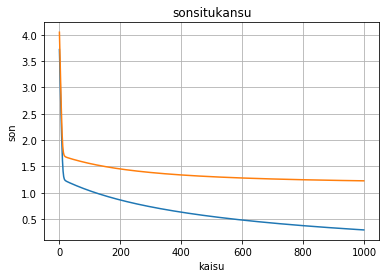

In [210]:
#グラフ化
plt.title("sonsitukansu")
plt.xlabel('kaisu')
plt.ylabel('son')
plt.grid()
plt.plot(aaaa,b)
plt.plot(aaaa,c)
plt.show()

## 【問題8】決定領域の可視化

In [191]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [198]:
sr_tt = ScratchLogisticRegression_t(num_iter=1000, lr=0.001, bias='Ture', verbose='F')

In [199]:
a,b,c=sr_tt.fit(X_2b,y_train)
#a,b,c=sr_t.fit(X_train,y_train)

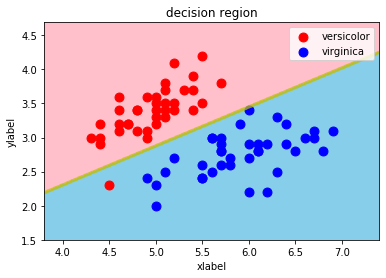

In [203]:
decision_region(X=X_train_2, y=y_train, model=sr_tt)

In [197]:
print(X_train.shape)
print(y_train.shape)
print(X_train_2.shape)

(75, 4)
(75,)
(75, 2)


In [205]:
X_train_2=X_train[:,0:2]
X_test_2=X_test[:,0:2]